In [1]:
library(readxl)

In [2]:
df = read_excel('mult_regr.xlsx')

In [4]:
mod1 = lm(HeatFlux ~ ., data = df)

In [5]:
summary(mod1)


Call:
lm(formula = HeatFlux ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9748  -3.9549  -0.0943   3.8171  20.5014 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 389.1659    66.0937   5.888 3.83e-06 ***
East          2.1247     1.2145   1.750   0.0925 .  
South         5.3185     0.9629   5.523 9.69e-06 ***
North       -24.1324     1.8685 -12.915 1.46e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.598 on 25 degrees of freedom
Multiple R-squared:  0.8741,	Adjusted R-squared:  0.859 
F-statistic: 57.87 on 3 and 25 DF,  p-value: 2.167e-11


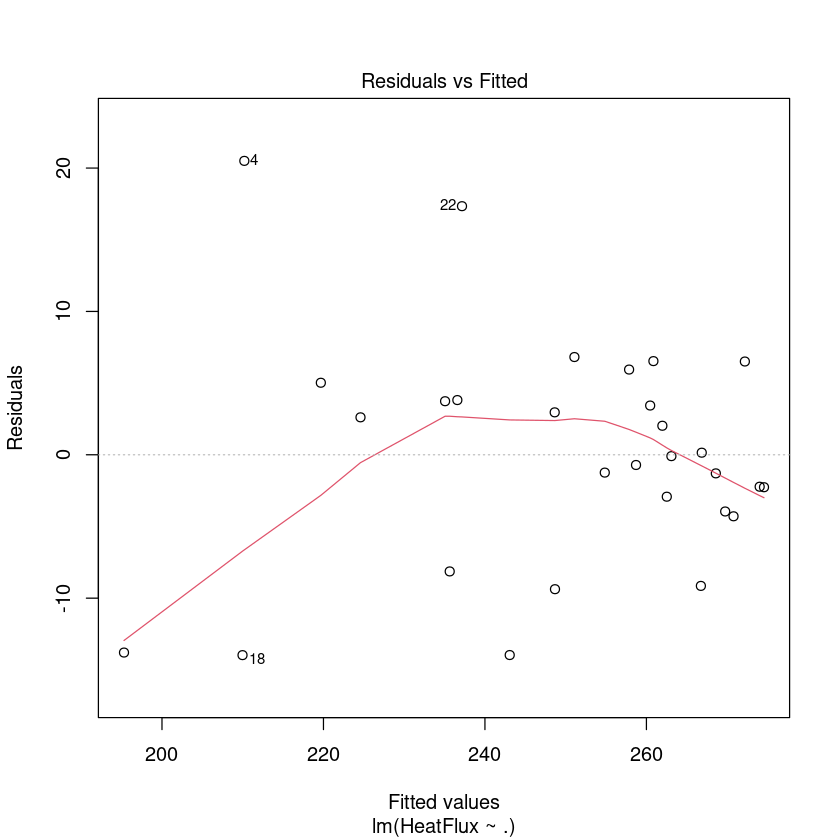

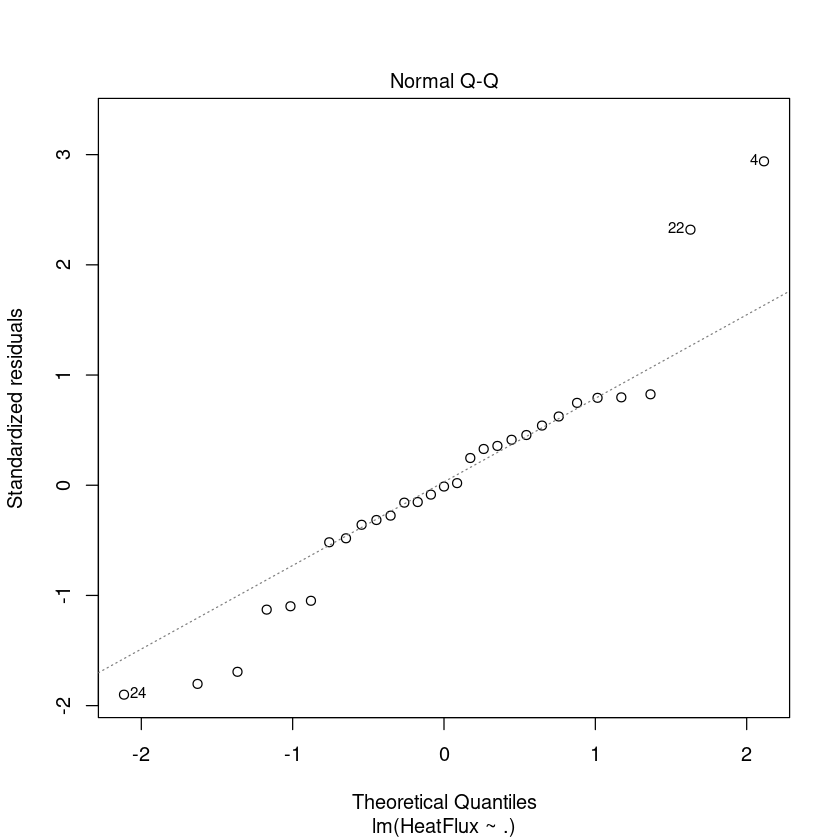

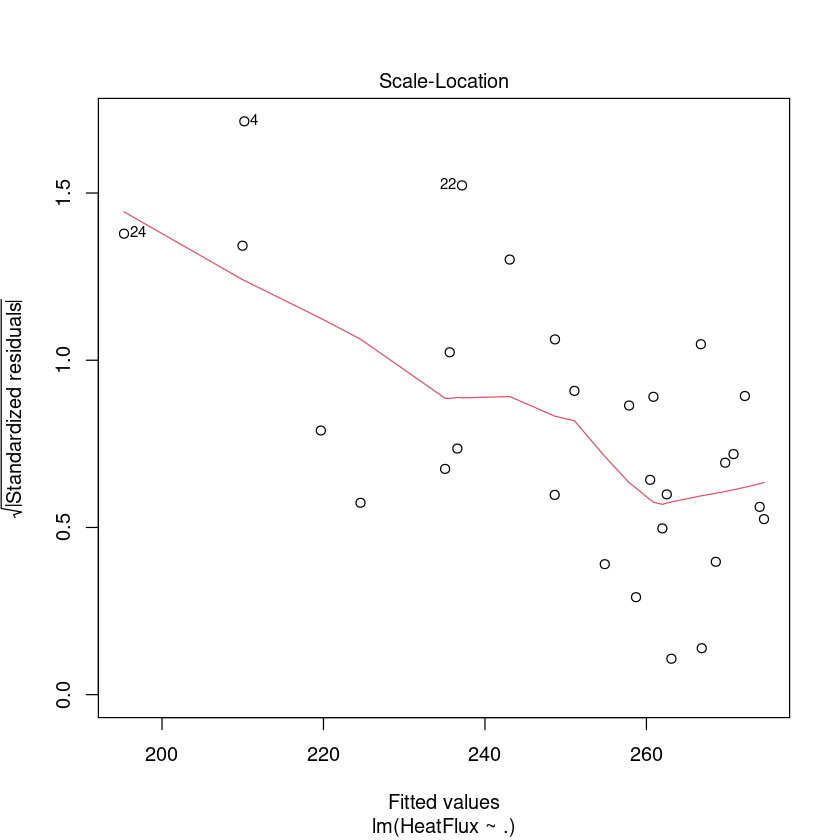

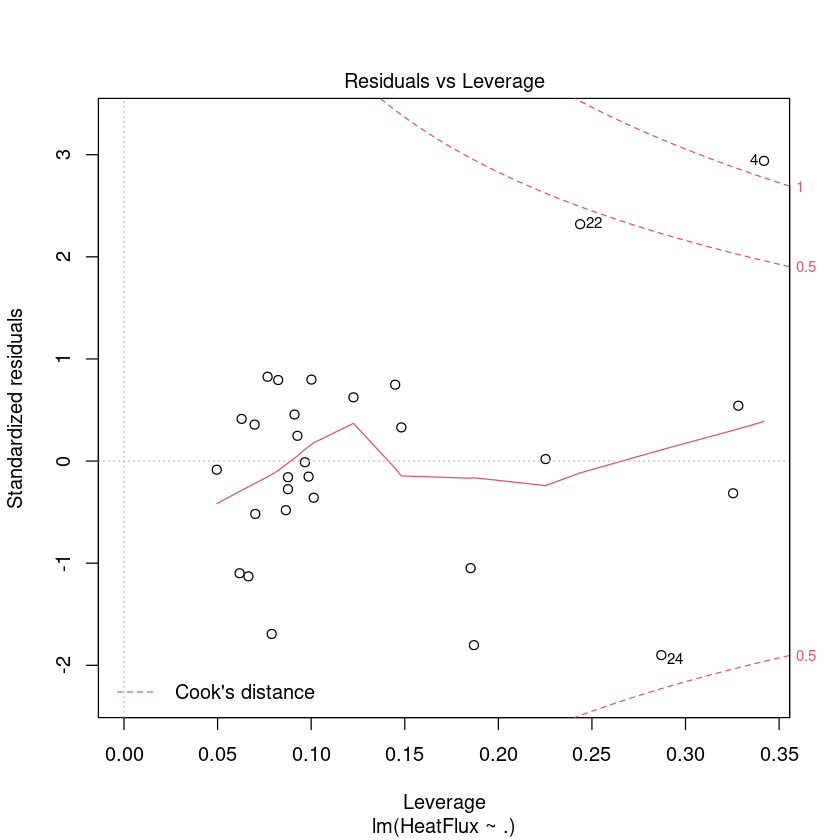

In [6]:
plot(mod1)

# Multicollinearity

In [7]:
df = read_excel('WageData.xlsx')

In [8]:
head(df)

Edu,Locn,Gender,Exp,Union,Age,Race,Occp,Sector,Marr,Wage
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,0,1,21,0,35,2,6,1,1,5.10
9,0,1,42,0,57,3,6,1,1,4.95
12,0,0,1,0,19,3,6,1,0,6.67
12,0,0,4,0,22,3,6,0,0,4.00
12,0,0,17,0,35,3,6,0,1,7.50
13,0,0,9,1,28,3,6,0,0,13.07


In [9]:
mod2 = lm(Wage ~ ., data = df)

In [10]:
summary(mod2)


Call:
lm(formula = Wage ~ ., data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-9.190 -2.616 -0.684  1.873 37.301 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.0402     6.8790  -0.297  0.76690    
Edu           1.3262     1.1082   1.197  0.23194    
Locn         -0.6975     0.4285  -1.628  0.10414    
Gender       -2.1443     0.3993  -5.370 1.19e-07 ***
Exp           0.5246     1.1086   0.473  0.63625    
Union         1.5168     0.5250   2.889  0.00403 ** 
Age          -0.4282     1.1079  -0.386  0.69931    
Race          0.4786     0.2855   1.676  0.09426 .  
Occp         -0.1527     0.1312  -1.165  0.24475    
Sector        0.7190     0.3876   1.855  0.06414 .  
Marr          0.4252     0.4195   1.013  0.31131    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.401 on 523 degrees of freedom
Multiple R-squared:  0.2805,	Adjusted R-squared:  0.2667 
F-statistic: 20.39 on 10 and 523 DF,  p-v

In [11]:
library(car)

Loading required package: carData



vif is the abbreviation for Variane Inflation Factor, which is used to check multi-collinearity
- When vif value > 5 then multicollinearity exists
- We keep removing the data which has the highest vif value until all data have a vif value < 5

In [12]:
vif(mod2)

Edu        Locn      Gender         Exp       Union         Age 
 231.195580    1.046828    1.091634 5184.093895    1.120861 4645.664977 
       Race        Occp      Sector        Marr 
   1.037138    1.298232    1.198670    1.096130

In [13]:
cor(df$Exp , df$Age)

[1] 0.9779612

In [14]:
mod3 = lm(Wage ~. -Exp, data = df)

In [16]:
vif(mod3)

Edu     Locn   Gender    Union      Age     Race     Occp   Sector 
1.125994 1.046306 1.088334 1.120743 1.154496 1.037015 1.295935 1.198460 
    Marr 
1.094289

In [17]:
summary(mod3)


Call:
lm(formula = Wage ~ . - Exp, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-9.178 -2.624 -0.679  1.884 37.284 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.20060    1.64803  -3.156  0.00169 ** 
Edu          0.80309    0.07728  10.392  < 2e-16 ***
Locn        -0.70205    0.42804  -1.640  0.10158    
Gender      -2.13391    0.39840  -5.356 1.27e-07 ***
Union        1.51428    0.52462   2.886  0.00406 ** 
Age          0.09606    0.01745   5.504 5.82e-08 ***
Race         0.48003    0.28524   1.683  0.09299 .  
Occp        -0.15013    0.13095  -1.146  0.25213    
Sector       0.71656    0.38725   1.850  0.06482 .  
Marr         0.41705    0.41888   0.996  0.31989    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.397 on 524 degrees of freedom
Multiple R-squared:  0.2802,	Adjusted R-squared:  0.2678 
F-statistic: 22.66 on 9 and 524 DF,  p-value: < 2.2e-16
